In [4]:
hidden_size = 10

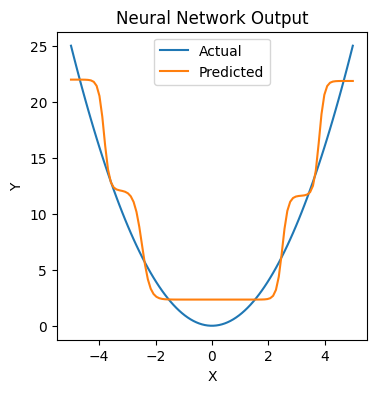

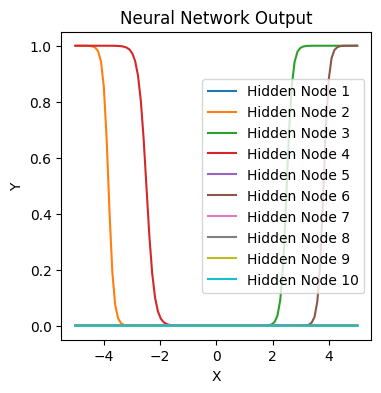

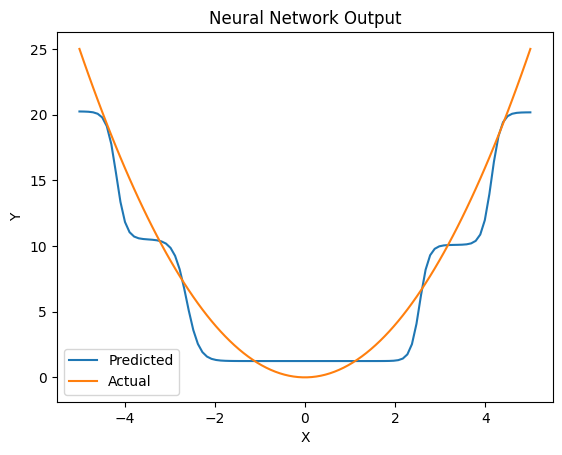

In [3]:
# @title Backpropagation algorithm
# prompt: write a code for backpropagation algorithm for a x^2. Create a neural network with one hidden layer and multiple nodes. Create some samples to test the model. Add a graph to vizualize output from each hidden node, plot lines on same graph with x on x axis

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Define the neural network architecture
input_size = 1
output_size = 1

# Initialize weights and biases
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

# Define the activation function (sigmoid)
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

# Define the derivative of the sigmoid function
def sigmoid_derivative(x):
  return x * (1 - x)

# Generate some sample data
X = np.linspace(-5, 5, 100).reshape(-1, 1)
Y = X ** 2

# Training parameters
learning_rate = 0.01
epochs = 1000
# Training loop
loss_history = []
predicted_output_history = []

# Training loop
for epoch in range(epochs):
  # Forward propagation
  hidden_layer_input = np.dot(X, W1) + b1
  hidden_layer_output = sigmoid(hidden_layer_input)
  output_layer_input = np.dot(hidden_layer_output, W2) + b2
  output_layer_output = output_layer_input # No activation for regression

  # Calculate the loss (mean squared error)
  loss = np.mean((Y - output_layer_output) ** 2)

  # Backpropagation
  d_output = -(Y - output_layer_output)
  d_hidden_layer = np.dot(d_output, W2.T) * sigmoid_derivative(hidden_layer_output)

  # Update weights and biases
  W2 -= learning_rate * np.dot(hidden_layer_output.T, d_output)
  b2 -= learning_rate * np.sum(d_output, axis=0, keepdims=True)
  W1 -= learning_rate * np.dot(X.T, d_hidden_layer)
  b1 -= learning_rate * np.sum(d_hidden_layer, axis=0, keepdims=True)

  # Print the loss every 100 epochs
  #if epoch % 100 == 0:
    #print(f"Epoch {epoch}, Loss: {loss}")
   # Store predicted output for animation
  if epoch % 100 == 0:
    predicted_output_history.append(output_layer_output)
# Plot the results
plt.figure(figsize=(4, 4))

# Plot actual vs predicted
plt.plot(X, Y, label="Actual")
plt.plot(X, output_layer_output, label="Predicted")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Neural Network Output")
plt.legend()
plt.show()

# Plot the results
plt.figure(figsize=(4, 4))
# Plot the output from each hidden node
for i in range(hidden_size):
  plt.plot(X, hidden_layer_output[:,i], label=f"Hidden Node {i+1}")

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Neural Network Output")
plt.legend()
plt.show()

fig, ax = plt.subplots()
line_predicted, = ax.plot(X, predicted_output_history[0], label="Predicted")
line_actual, = ax.plot(X, Y, label="Actual")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_title("Neural Network Output")
ax.legend()

def animate(i):
  line_predicted.set_data(X, predicted_output_history[i])
  return line_predicted,

ani = FuncAnimation(fig, animate, frames=len(predicted_output_history), interval=50, blit=True)

# Display the animation
HTML(ani.to_jshtml())

plt.show()

# prompt: how to view the animation generated above?

# Display the animation within the notebook
HTML(ani.to_jshtml())


<ipython-input-39-cd44bb3e5f24>:23: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


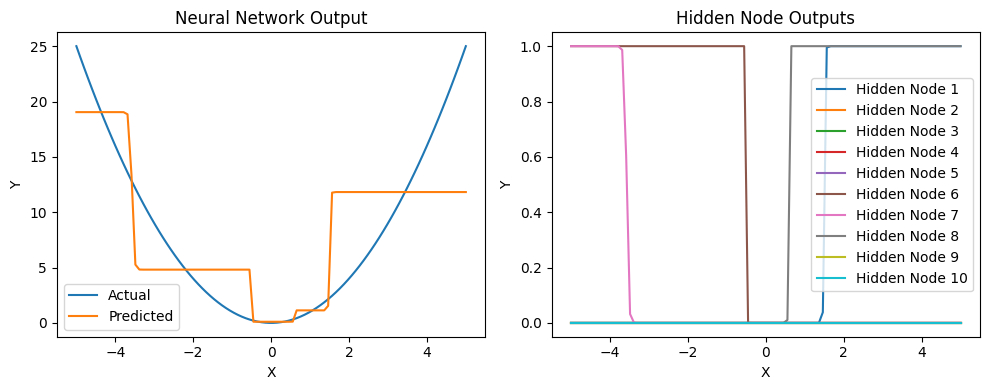

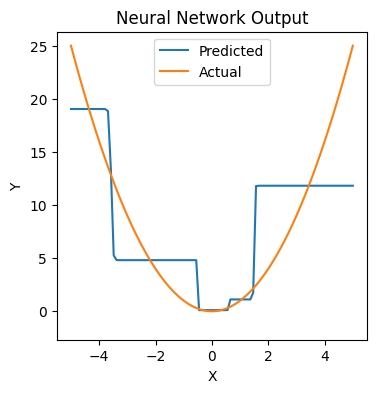

In [ ]:
# prompt: modify above code to plot all graphs next to each other

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
hidden_size = 10
# @title Default title text


# Define the neural network architecture
input_size = 1
output_size = 1

# Initialize weights and biases
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

# Define the activation function (sigmoid)
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

# Define the derivative of the sigmoid function
def sigmoid_derivative(x):
  return x * (1 - x)

# Generate some sample data
X = np.linspace(-5, 5, 100).reshape(-1, 1)
Y = X ** 2

# Training parameters
learning_rate = 0.01
epochs = 1000
# Training loop
loss_history = []
predicted_output_history = []

# Training loop
for epoch in range(epochs):
  # Forward propagation
  hidden_layer_input = np.dot(X, W1) + b1
  hidden_layer_output = sigmoid(hidden_layer_input)
  output_layer_input = np.dot(hidden_layer_output, W2) + b2
  output_layer_output = output_layer_input # No activation for regression

  # Calculate the loss (mean squared error)
  loss = np.mean((Y - output_layer_output) ** 2)

  # Backpropagation
  d_output = -(Y - output_layer_output)
  d_hidden_layer = np.dot(d_output, W2.T) * sigmoid_derivative(hidden_layer_output)

  # Update weights and biases
  W2 -= learning_rate * np.dot(hidden_layer_output.T, d_output)
  b2 -= learning_rate * np.sum(d_output, axis=0, keepdims=True)
  W1 -= learning_rate * np.dot(X.T, d_hidden_layer)
  b1 -= learning_rate * np.sum(d_hidden_layer, axis=0, keepdims=True)

  # Print the loss every 100 epochs
  #if epoch % 100 == 0:
    #print(f"Epoch {epoch}, Loss: {loss}")
   # Store predicted output for animation
  if epoch % 100 == 0:
    predicted_output_history.append(output_layer_output)

# Create subplots to arrange the graphs side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))


# Plot actual vs predicted in the first subplot
ax1.plot(X, Y, label="Actual")
ax1.plot(X, output_layer_output, label="Predicted")
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_title("Neural Network Output")
ax1.legend()

# Plot the output from each hidden node in the second subplot
for i in range(hidden_size):
  ax2.plot(X, hidden_layer_output[:,i], label=f"Hidden Node {i+1}")

ax2.set_xlabel("X")
ax2.set_ylabel("Y")
ax2.set_title("Hidden Node Outputs")
ax2.legend()

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

fig, ax = plt.subplots(figsize=(4, 4))
line_predicted, = ax.plot(X, predicted_output_history[0], label="Predicted")
line_actual, = ax.plot(X, Y, label="Actual")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_title("Neural Network Output")
ax.legend()

def animate(i):
  line_predicted.set_data(X, predicted_output_history[i])
  return line_predicted,

ani = FuncAnimation(fig, animate, frames=len(predicted_output_history), interval=50, blit=True)

# Display the animation
HTML(ani.to_jshtml())

#plt.show()


# Display the animation within the notebook
#HTML(ani.to_jshtml())
